In [1]:
import numpy as np
from numpy.random import randn
import pandas as pd
from scipy import stats
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
dataset = randn(25)

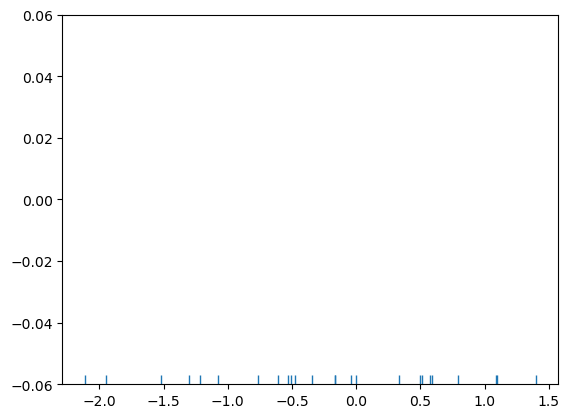

In [5]:
sns.rugplot(dataset)
plt.show()

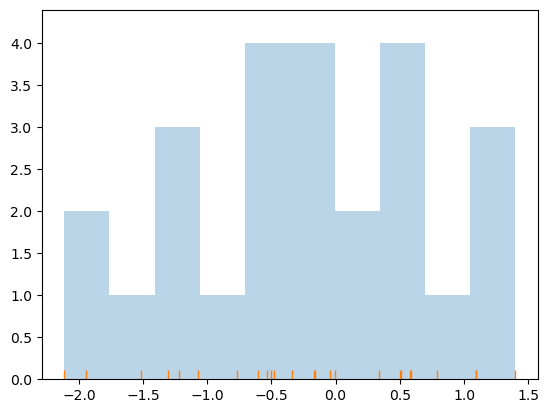

In [7]:
plt.hist(dataset, alpha = 0.3)
sns.rugplot(dataset)
plt.show()

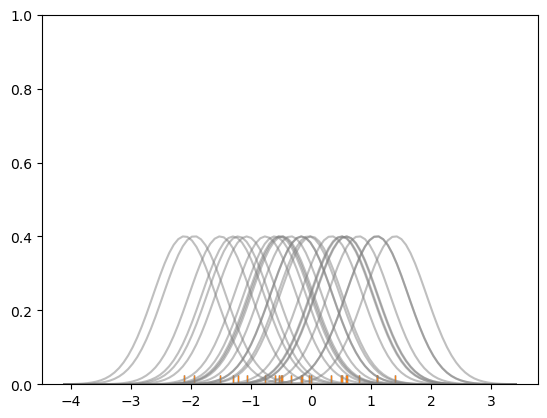

In [11]:
# long way to make a kde plot
sns.rugplot(dataset)
x_min = dataset.min() - 2
x_max = dataset.max() + 2
# linear space
x_axis = np.linspace(x_min, x_max, 100)
# gaussian bandwidth
bandwidth = ((4 * dataset.std() ** 5) / (3 * len(dataset))) ** 0.2

# kernels
kernel_list = []

for data_point in dataset:
    # create a kernel and append it to kernel_list
    kernel = stats.norm(data_point, bandwidth).pdf(x_axis)
    kernel_list.append(kernel)
    # scale for plotting
    kernel = kernel / kernel.max()
    kernel = kernel * 0.4
    # plot
    plt.plot(x_axis,kernel, color = "grey", alpha = 0.5)

plt.ylim(0, 1)
plt.show()

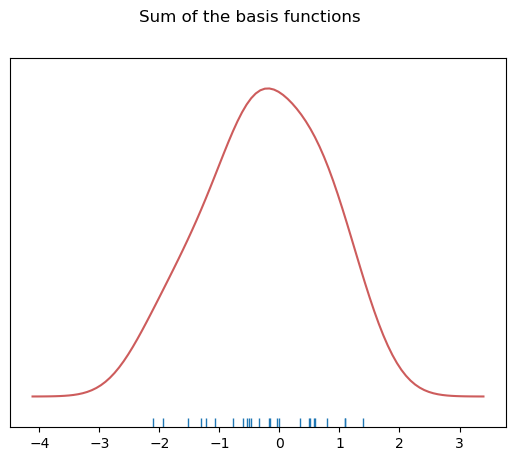

In [15]:
# continued
sum_of_kde = np.sum(kernel_list, axis = 0)
fig = plt.plot(x_axis, sum_of_kde, color = "indianred")
sns.rugplot(dataset)

# get ride of tick marks
plt.yticks([])
# title plot
plt.suptitle("Sum of the basis functions")
plt.show()

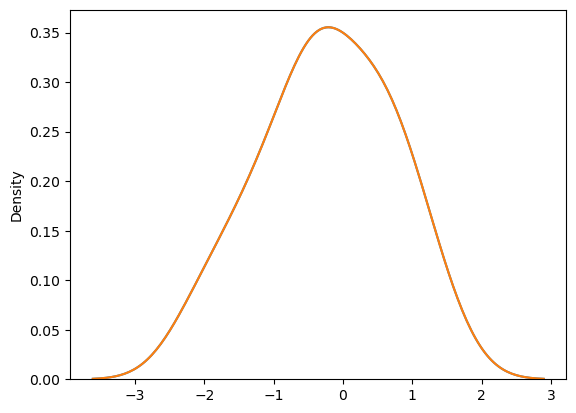

In [21]:
# faster way using seaborn
sns.kdeplot(dataset)
plt.show()

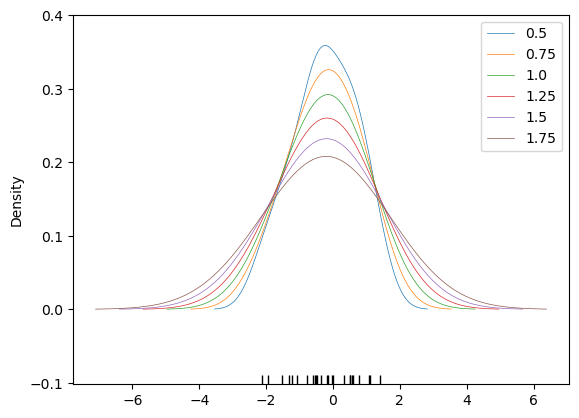

In [33]:
# adjusting bandwidths
sns.rugplot(dataset, color = "black")

for bw in np.arange(0.5, 2, 0.25):
    sns.kdeplot(dataset, bw_method = bw, lw = 0.5, label = bw)
plt.legend() # shows label in top-right corner of plot
plt.show()

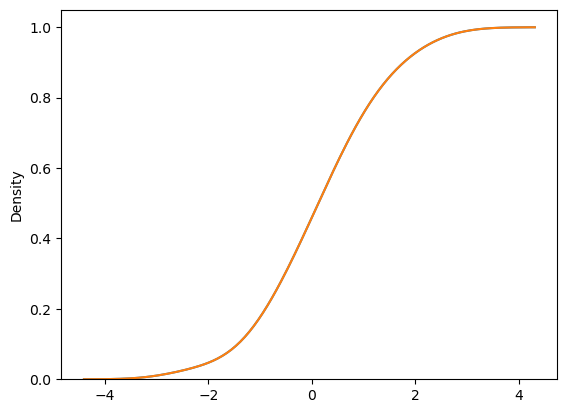

In [28]:
sns.kdeplot(dataset, cumulative = True)
plt.show()